In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/itmo-spbu-flat-price-prediction-2023-1/solution_example_full.csv
/kaggle/input/itmo-spbu-flat-price-prediction-2023-1/solution_example.csv
/kaggle/input/itmo-spbu-flat-price-prediction-2023-1/test.csv
/kaggle/input/itmo-spbu-flat-price-prediction-2023-1/data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
submission = pd.read_csv("/kaggle/input/itmo-spbu-flat-price-prediction-2023-1/solution_example_full.csv")
submission.head()

,index,price
0,0,7386737
1,1,10621075
2,2,11926850
3,3,5986359
4,4,11137081


In [5]:
train_data = pd.read_csv("/kaggle/input/itmo-spbu-flat-price-prediction-2023-1/data.csv")
train_data.head()

,index,kitchen_area,bath_area,other_area,gas,hot_water,central_heating,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,extra_area_type_name,district_name,rooms_count,price
0,0,7,10,28.909001,Yes,Yes,Yes,14,1,1949,2.50,7,4,50.575668,1,loggia,Nevskij,1,7386737
1,1,10,35,25.128482,Yes,Yes,Yes,19,0,1980,2.50,10,2,76.461816,2,balcony,Vyborgskij,1,10621075
2,2,13,20,53.268883,Yes,No,Yes,1,1,1918,2.50,3,1,86.602216,2,balcony,Kirovskij,4,11926850
3,3,16,11,15.206584,Yes,Yes,Yes,3,0,2004,2.50,15,13,43.206584,1,balcony,Kirovskij,0,5986359
4,4,18,20,22.550463,Yes,No,Yes,0,1,1951,4.44,7,4,60.550463,2,loggia,Centralnyj,2,11137081


<Axes: xlabel='bath_count', ylabel='bath_area'>

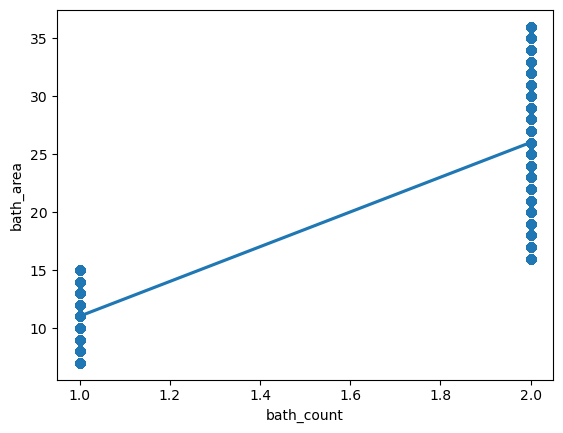

In [6]:
sns.regplot(x = train_data.bath_count , y = train_data.bath_area)

In [7]:
#import pandas_profiling as pdp
#report = pdp.ProfileReport(train_data)
#report

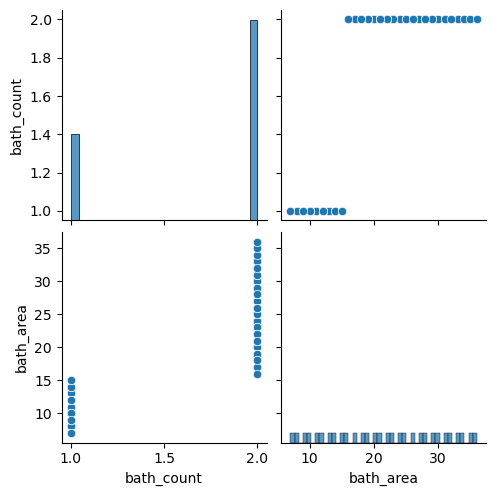

In [8]:
sns.pairplot(train_data[['bath_count', 'bath_area']])  # Replace with your feature names

In [9]:
# 1. Removing highly corellational feature
train_data = train_data.drop("bath_area", axis = 1)
# 2. Perform one-hot encoding
categorical_features = ['gas', 'hot_water', 'central_heating', 'extra_area_type_name', 'district_name']
train_data = pd.get_dummies(train_data, columns=categorical_features)
# 3. Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data[['total_area', 'other_area']] = scaler.fit_transform(train_data[['total_area', 'other_area']])

train_data

,index,kitchen_area,other_area,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,...,central_heating_Yes,extra_area_type_name_balcony,extra_area_type_name_loggia,district_name_Centralnyj,district_name_Kirovskij,district_name_Krasnoselskij,district_name_Moskovskij,district_name_Nevskij,district_name_Petrogradskij,district_name_Vyborgskij
0,0,7,0.223883,14,1,1949,2.50,7,4,0.188619,...,1,0,1,0,0,0,0,1,0,0
1,1,10,0.176622,19,0,1980,2.50,10,2,0.389310,...,1,1,0,0,0,0,0,0,0,1
2,2,13,0.528409,1,1,1918,2.50,3,1,0.467928,...,1,1,0,0,1,0,0,0,0,0
3,3,16,0.052587,3,0,2004,2.50,15,13,0.131487,...,1,1,0,0,1,0,0,0,0,0
4,4,18,0.144394,0,1,1951,4.44,7,4,0.265952,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,10,0.125099,4,1,1977,3.53,13,10,0.318593,...,1,0,1,0,0,1,0,0,0,0
99996,99996,14,0.122125,9,1,1954,3.56,9,8,0.159107,...,1,0,1,1,0,0,0,0,0,0
99997,99997,25,0.042284,1,1,1938,3.16,4,3,0.383527,...,1,0,1,0,0,1,0,0,0,0
99998,99998,17,0.154826,7,1,2006,4.64,11,6,0.290512,...,1,0,1,1,0,0,0,0,0,0


In [10]:
test_data = pd.read_csv("/kaggle/input/itmo-spbu-flat-price-prediction-2023-1/test.csv")
test_data.head()

,index,kitchen_area,bath_area,other_area,gas,hot_water,central_heating,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,extra_area_type_name,district_name,rooms_count
0,0,20,9,55.908652,Yes,Yes,Yes,8,1,1929,2.50,4,3,87.575319,1,balcony,Nevskij,2
1,1,9,13,14.921374,Yes,Yes,Yes,15,1,1966,2.50,8,5,41.921374,1,loggia,Moskovskij,0
2,2,25,12,18.953026,Yes,No,No,8,1,1972,2.50,12,3,58.619693,1,loggia,Centralnyj,1
3,3,17,22,36.215567,Yes,No,No,2,1,2013,2.50,9,2,75.882234,2,balcony,Kirovskij,2
4,4,15,12,61.537642,No,Yes,Yes,18,1,1922,2.75,3,3,94.537642,1,loggia,Vyborgskij,2


In [11]:
# 1. Removing highly corellational feature
test_data = test_data.drop("bath_area", axis = 1)
# 2. Perform one-hot encoding
categorical_features = ['gas', 'hot_water', 'central_heating', 'extra_area_type_name', 'district_name']
test_data = pd.get_dummies(test_data, columns=categorical_features)
# 3. Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
test_data[['total_area', 'other_area']] = scaler.fit_transform(train_data[['total_area', 'other_area']])

test_data

,index,kitchen_area,other_area,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,...,central_heating_Yes,extra_area_type_name_balcony,extra_area_type_name_loggia,district_name_Centralnyj,district_name_Kirovskij,district_name_Krasnoselskij,district_name_Moskovskij,district_name_Nevskij,district_name_Petrogradskij,district_name_Vyborgskij
0,0,20,0.223883,8,1,1929,2.50,4,3,0.188619,...,1,1,0,0,0,0,0,1,0,0
1,1,9,0.176622,15,1,1966,2.50,8,5,0.389310,...,1,0,1,0,0,0,1,0,0,0
2,2,25,0.528409,8,1,1972,2.50,12,3,0.467928,...,0,0,1,1,0,0,0,0,0,0
3,3,17,0.052587,2,1,2013,2.50,9,2,0.131487,...,0,1,0,0,1,0,0,0,0,0
4,4,15,0.144394,18,1,1922,2.75,3,3,0.265952,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,17,0.125099,11,1,1904,2.50,2,2,0.318593,...,1,0,1,0,1,0,0,0,0,0
99996,99996,25,0.122125,7,1,1902,3.86,3,1,0.159107,...,1,1,0,1,0,0,0,0,0,0
99997,99997,15,0.042284,10,1,1922,2.50,4,4,0.383527,...,1,1,0,0,0,1,0,0,0,0
99998,99998,18,0.154826,10,1,1949,3.70,6,6,0.290512,...,0,0,1,1,0,0,0,0,0,0


In [12]:
print(max(train_data.year))
year_new_train = 2020 - train_data.year

print(max(test_data.year))
year_new_test = 2020 - test_data.year

train_data.year = year_new_train
test_data.year = year_new_test



2020
2020


In [13]:
# Dealing with feature name problem.
train_data = train_data.rename(columns = {"df_index": "index"} )

In [14]:
X = train_data.drop("price", axis = 1)
y = train_data.price

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = [
    LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data.drop("price", axis=1), train_data["price"], test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
print("Linear Regression (RMSE):", rmse)


Linear Regression (RMSE): 587486.9810853625


In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create the model
gb_model = GradientBoostingRegressor()

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate RMSE
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print("RMSE (Gradient Boosting):", rmse_gb)


RMSE (Gradient Boosting): 237356.86495035817


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create the model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("RMSE (Random Forest):", rmse_rf)


RMSE (Random Forest): 198203.03948924117


In [19]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create the model
xgb_model = xgb.XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print("RMSE (XGBoost):", rmse_xgb)


RMSE (XGBoost): 141370.79871207383


In [20]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create the model
svr_model = SVR()

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svr = svr_model.predict(X_test)

# Calculate RMSE
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
print("RMSE (SVR):", rmse_svr)


RMSE (SVR): 4113803.1939286436


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create the model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate RMSE
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print("RMSE (Decision Tree):", rmse_dt)


RMSE (Decision Tree): 290295.8924735819


In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Create the model
lasso_model = Lasso()

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Calculate RMSE
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print("RMSE (Lasso Regression):", rmse_lasso)


RMSE (Lasso Regression): 587486.346941078


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.846e+14, tolerance: 1.297e+14
  model = cd_fast.enet_coordinate_descent(


In [23]:
print("RMSE (Lasso Regression):", rmse_lasso)
print("RMSE (Decision Tree):", rmse_dt)
print("RMSE (SVR):", rmse_svr)
print("RMSE (XGBoost):", rmse_xgb)
print("RMSE (Gradient Boosting):", rmse_gb)
print("Linear Regression (RMSE):", rmse)
print("RMSE (Random Forest):", rmse_rf)


RMSE (Lasso Regression): 587486.346941078
RMSE (Decision Tree): 290295.8924735819
RMSE (SVR): 4113803.1939286436
RMSE (XGBoost): 141370.79871207383
RMSE (Gradient Boosting): 237356.86495035817
Linear Regression (RMSE): 587486.9810853625
RMSE (Random Forest): 198203.03948924117


In [24]:
# Define the parameters
params = {
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'max_depth': 7,
    'subsample': 0.9,
    'colsample_bytree': 0.9
}

# Create the XGBoost model
xgb_model = xgb.XGBRegressor(**params)

# Train the model
xgb_model.fit(X, y)

# Make predictions on the test set
final = xgb_model.predict(test_data)



In [25]:
submission["price"] = final
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission


,index,price
0,0,7717350.5
1,1,15250794.0
2,2,15024607.0
3,3,5981084.0
4,4,8469042.0
...,...,...
99995,99995,9549738.0
99996,99996,8502571.0
99997,99997,10391202.0
99998,99998,11593121.0
